## Machine Learning Assessment - Dure Sabih (Student ID 0070990)

Task 1 (a) 

In [32]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation

### Loading the Dataset

In [35]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# EDA AND DATA PRE-PROCESSING

In [36]:
dataset.shape

(299, 13)

In [37]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
dataset.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [39]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [41]:
dataset.isnull().sum()       #No null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [42]:
#Checking duplicate rows 
dataset.duplicated().any().sum()

0

In [43]:
dataset.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [44]:
col_with_binary_vals = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']

In [45]:
col_without_binary_vals=[i for i in dataset.columns if i not in col_with_binary_vals]

In [46]:
col_without_binary_vals

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

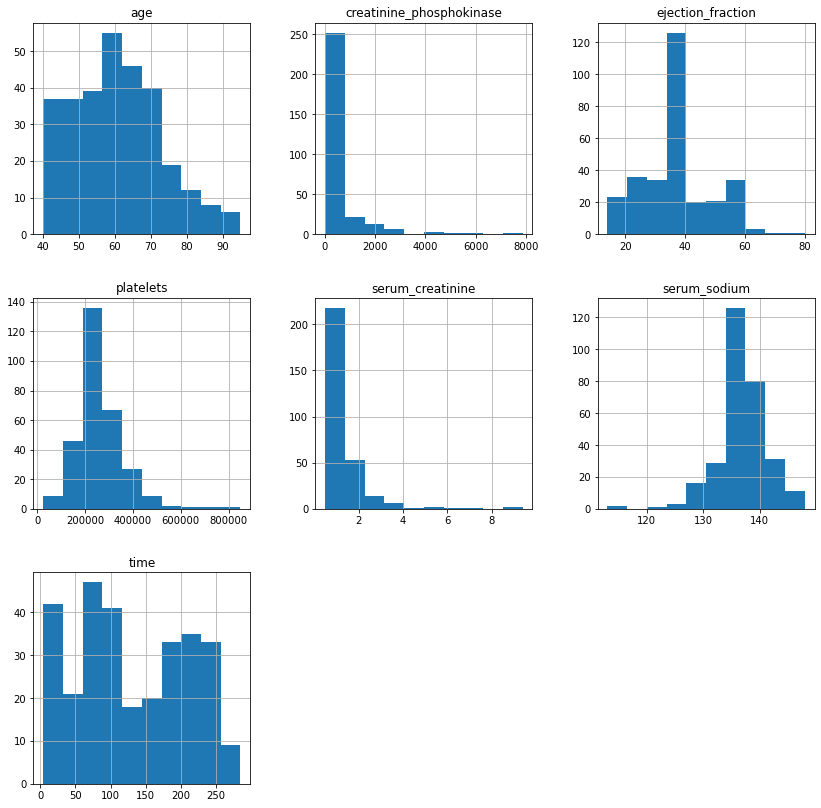

In [47]:
# Creating histograms to chech distriution
dataset[col_without_binary_vals].hist(figsize=(14,14))
plt.show()

for i in col_with_binary_vals:
    ax=sns.countplot(x=dataset[i])
    ax.bar_label(ax.containers[0])
    plt.title(f'{i} Count Distribution')
    plt.xlabel(f'{i}')
    plt.ylabel(f'{i} Count')
    plt.xticks(rotation = 90);
    plt.show()

C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

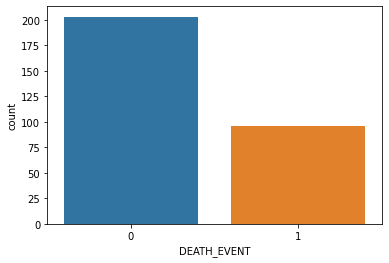

In [48]:
#Plot the unique values to check class imbalance
sns.countplot(dataset['DEATH_EVENT']).unique()

In [49]:
num_var = dataset.loc[:,['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 'serum_sodium', 'time']].copy()

C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DCPC\anaconda3\lib\site-p

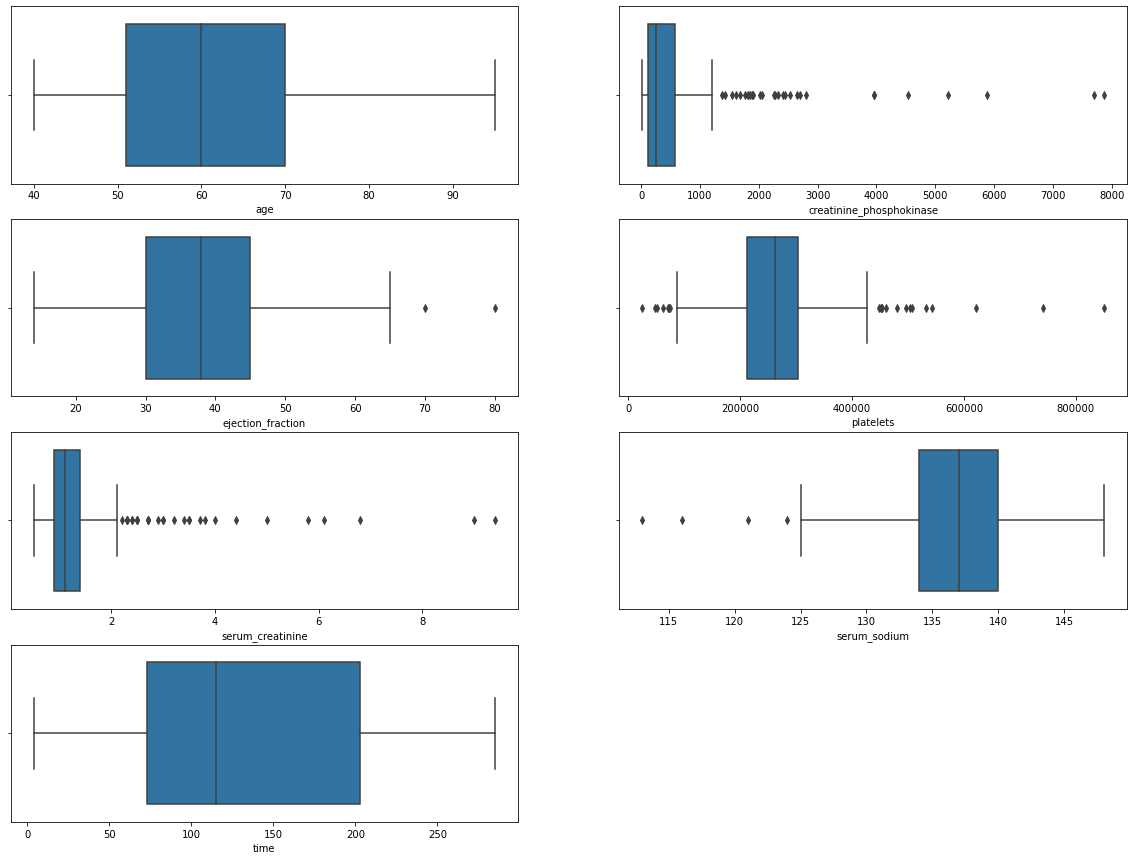

In [50]:
plt.figure(figsize=(20,15))
plt.title("Box Plot for Features")
for i in range(len(num_var.columns)):
    plt.subplot(4,2 , i+1)
    sns.boxplot(num_var[num_var.columns[i]])


<function matplotlib.pyplot.show(close=None, block=None)>

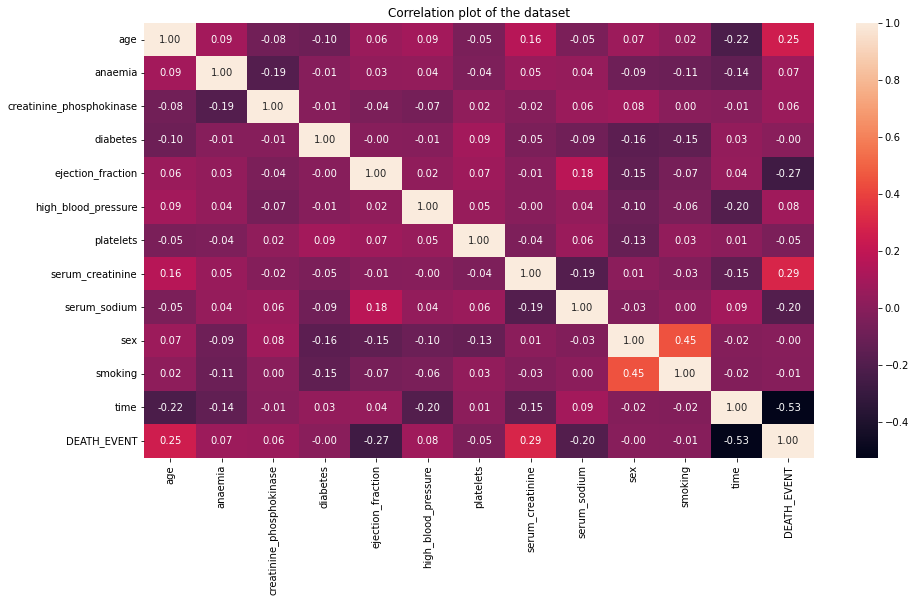

In [51]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True, fmt='0.2f')
plt.title('Correlation plot of the dataset')
plt.show

In [52]:
z = np.abs(stats.zscore(dataset))
dataset3=dataset[(z<3).all(axis=1)]
dataset3.shape

(280, 13)

Splitting data

In [53]:
features_var = dataset.drop(['DEATH_EVENT'], axis=1)
target_var = dataset['DEATH_EVENT']

In [54]:
#MinMaxScaler
scaler=MinMaxScaler()
features_var=pd.DataFrame(scaler.fit_transform(features_var), columns=features_var.columns.tolist())

In [55]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features_var, target_var, test_size=0.3, random_state=42, stratify=target_var)

In [56]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.83      0.67      0.74        67

    accuracy                           0.85       209
   macro avg       0.85      0.80      0.82       209
weighted avg       0.85      0.85      0.85       209



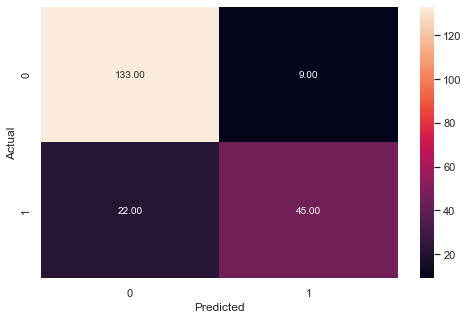

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        61
           1       0.88      0.52      0.65        29

    accuracy                           0.82        90
   macro avg       0.85      0.74      0.77        90
weighted avg       0.83      0.82      0.81        90



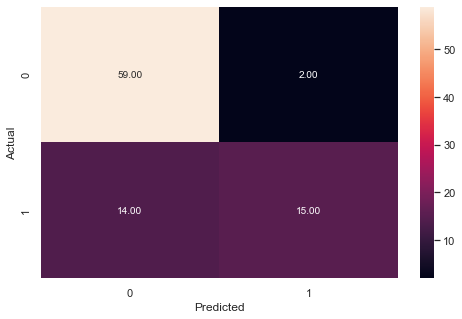

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)

metrics_score(y_test, y_pred_test)

In [ ]:
#coefficients of logistic regression

cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
serum_creatinine,1.945388
creatinine_phosphokinase,0.845322
age,0.752731
anaemia,0.227423
smoking,0.165201
diabetes,0.165118
high_blood_pressure,-0.011153
sex,-0.063527
platelets,-0.220487
serum_sodium,-0.573231


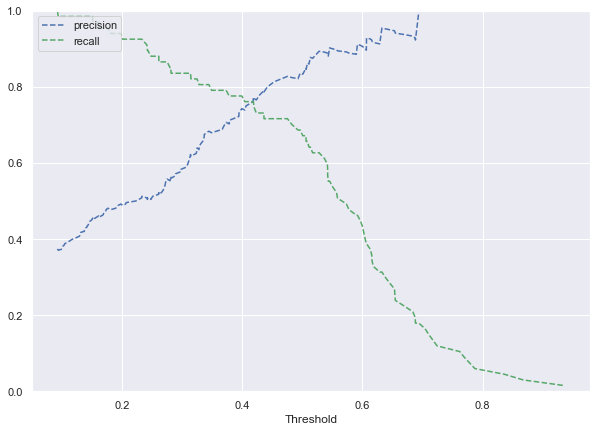

In [ ]:
# Predict_proba 
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       142
           1       0.76      0.76      0.76        67

    accuracy                           0.85       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.85      0.85      0.85       209



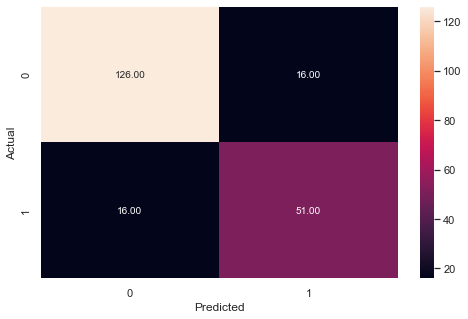

In [ ]:
optimal_threshold=.41
y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        61
           1       0.73      0.66      0.69        29

    accuracy                           0.81        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.81      0.81      0.81        90



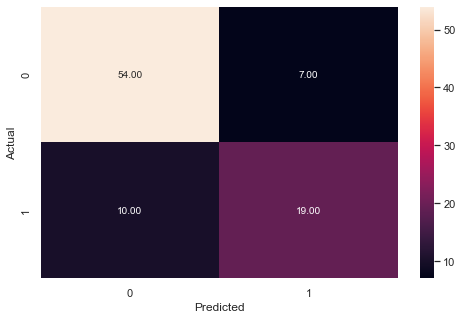

In [ ]:
optimal_threshold=.41
y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

In [29]:
# Setting the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

## Neural Network


In [39]:
model = Sequential()
model.add(Dense(130, activation='relu', input_shape=(12,)))
model.add(Dropout(0.2))
model.add(Dense(65, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 130)               1690      
                                                                 
 dropout (Dropout)           (None, 130)               0         
                                                                 
 dense_1 (Dense)             (None, 65)                8515      
                                                                 
 dropout_1 (Dropout)         (None, 65)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 66        
                                                                 
Total params: 10,271
Trainable params: 10,271
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_history = model.fit(X_train, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=1)

Epoch 1/150
6/6 [==============================] - 1s 35ms/step - loss: 0.6658 - accuracy: 0.6543 - val_loss: 0.6178 - val_accuracy: 0.7619
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6358 - accuracy: 0.6755 - val_loss: 0.5832 - val_accuracy: 0.7619
Epoch 3/150
6/6 [==============================] - 0s 10ms/step - loss: 0.6187 - accuracy: 0.6702 - val_loss: 0.5606 - val_accuracy: 0.7619
Epoch 4/150
6/6 [==============================] - 0s 8ms/step - loss: 0.6081 - accuracy: 0.6702 - val_loss: 0.5449 - val_accuracy: 0.7619
Epoch 5/150
6/6 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.6702 - val_loss: 0.5343 - val_accuracy: 0.7619
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6025 - accuracy: 0.6702 - val_loss: 0.5290 - val_accuracy: 0.7619
Epoch 7/150
6/6 [==============================] - 0s 7ms/step - loss: 0.5899 - accuracy: 0.6702 - val_loss: 0.5212 - val_accuracy: 0.7619
Epoch 8/150
6/6 [========

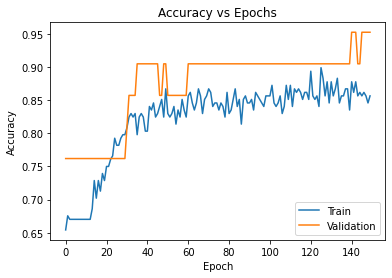

In [42]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [43]:
model.evaluate(X_train, y_train, verbose = 1)
train_pred = np.round(model.predict(X_train))

7/7 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       142
           1       0.86      0.76      0.81        67

    accuracy                           0.89       209
   macro avg       0.88      0.85      0.86       209
weighted avg       0.88      0.89      0.88       209



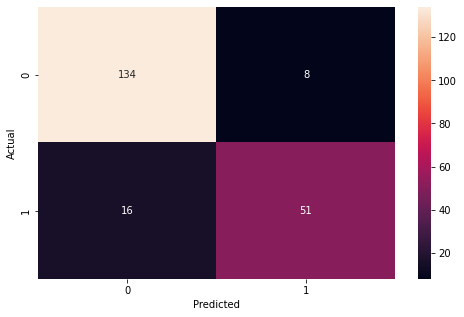

In [44]:
print(classification_report(y_train, train_pred))
cm = confusion_matrix(y_train, train_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [45]:
model.evaluate(X_test, y_test, verbose = 1)
test_pred = np.round(model.predict(X_test))

3/3 [==============================] - 0s 4ms/step


              precision    recall  f1-score   support

           0       0.84      0.92      0.88        61
           1       0.78      0.62      0.69        29

    accuracy                           0.82        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.82      0.82      0.82        90



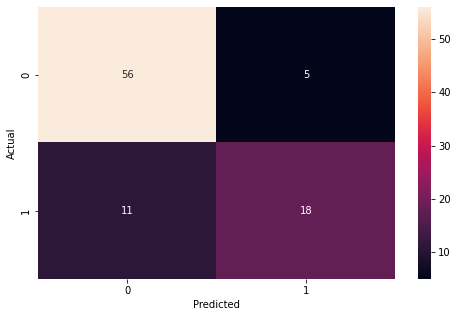

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [47]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()